In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Hopper-v2'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(243299, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(243901, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v2,15-07-2023 12:36:26,37,0,37,0.001839,1,38,True,30.767226,30.767226,30.767226,30.767226,30.767226,COMPER
1,1,2,Hopper-v2,15-07-2023 12:36:27,38,0,38,0.001889,1,39,True,31.967504,31.367365,31.367365,31.367365,31.367365,COMPER
2,1,3,Hopper-v2,15-07-2023 12:36:37,44,0,44,0.002187,1,45,True,39.032607,33.922446,33.922446,33.922446,33.922446,COMPER
3,1,4,Hopper-v2,15-07-2023 12:36:39,45,0,45,0.002237,1,46,True,40.084050,35.462847,35.462847,35.462847,35.462847,COMPER
4,1,5,Hopper-v2,15-07-2023 12:36:40,46,0,46,0.002286,1,47,True,41.182463,36.606770,36.606770,36.606770,36.606770,COMPER
5,1,6,Hopper-v2,15-07-2023 12:36:42,47,0,47,0.002336,1,48,True,42.343349,37.562866,37.562866,37.562866,37.562866,COMPER
6,1,7,Hopper-v2,15-07-2023 12:36:44,48,0,48,0.002386,1,49,True,43.565344,38.420363,38.420363,38.420363,38.420363,COMPER
7,1,8,Hopper-v2,15-07-2023 12:36:46,49,0,49,0.002435,1,50,True,44.841789,39.223041,39.223041,39.223041,39.223041,COMPER
8,1,9,Hopper-v2,15-07-2023 12:36:47,50,0,50,0.002485,1,51,True,46.162248,39.994064,39.994064,39.994064,39.994064,COMPER
9,1,10,Hopper-v2,15-07-2023 12:36:49,51,0,51,0.002535,1,52,True,47.512137,40.745872,40.745872,40.745872,40.745872,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v2,15-07-2023 12:10:33,36,37,0,0.001789,1,37,True,30.148661,30.148661,30.148661,30.148661,30.148661,DDPG
1,1,2,Hopper-v2,15-07-2023 12:10:33,37,38,0,0.001839,1,38,True,30.311087,30.229874,30.229874,30.229874,30.229874,DDPG
2,1,3,Hopper-v2,15-07-2023 12:10:33,38,39,0,0.001889,1,39,True,30.378735,30.279495,30.279495,30.279495,30.279495,DDPG
3,1,4,Hopper-v2,15-07-2023 12:10:33,39,40,0,0.001938,1,40,True,30.345592,30.296019,30.296019,30.296019,30.296019,DDPG
4,1,5,Hopper-v2,15-07-2023 12:10:33,40,41,0,0.001988,1,41,True,30.209532,30.278721,30.278721,30.278721,30.278721,DDPG
5,1,6,Hopper-v2,15-07-2023 12:10:33,41,42,0,0.002038,1,42,True,29.969774,30.227230,30.227230,30.227230,30.227230,DDPG
6,1,7,Hopper-v2,15-07-2023 12:10:33,42,43,0,0.002088,1,43,True,29.633608,30.142427,30.142427,30.142427,30.142427,DDPG
7,1,8,Hopper-v2,15-07-2023 12:10:34,43,44,0,0.002137,1,44,True,29.221299,30.027286,30.027286,30.027286,30.027286,DDPG
8,1,9,Hopper-v2,15-07-2023 12:10:34,44,45,0,0.002187,1,45,True,28.756188,29.886053,29.886053,29.886053,29.886053,DDPG
9,1,10,Hopper-v2,15-07-2023 12:10:34,45,46,0,0.002237,1,46,True,28.258530,29.723301,29.723301,29.723301,29.723301,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v2,15-07-2023 12:36:26,37,0,37,0.001839,1,38,True,30.767226,30.767226,30.767226,30.767226,30.767226,COMPER
1,1,2,Hopper-v2,15-07-2023 12:36:27,38,0,38,0.001889,1,39,True,31.967504,31.367365,31.367365,31.367365,31.367365,COMPER
2,1,3,Hopper-v2,15-07-2023 12:36:37,44,0,44,0.002187,1,45,True,39.032607,33.922446,33.922446,33.922446,33.922446,COMPER
3,1,4,Hopper-v2,15-07-2023 12:36:39,45,0,45,0.002237,1,46,True,40.084050,35.462847,35.462847,35.462847,35.462847,COMPER
4,1,5,Hopper-v2,15-07-2023 12:36:40,46,0,46,0.002286,1,47,True,41.182463,36.606770,36.606770,36.606770,36.606770,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
48779,5,48780,Hopper-v2,15-07-2023 19:30:22,49997,41236,0,0.999,50,998,True,1258.305684,610.916162,1217.351028,1253.621689,1259.935030,DDPG
48780,5,48781,Hopper-v2,15-07-2023 19:30:22,49998,41237,0,0.999,50,999,True,1258.128374,610.929430,1218.544959,1254.266665,1259.407034,DDPG
48781,5,48782,Hopper-v2,15-07-2023 19:30:23,49999,41238,0,0.999,50,1000,True,1257.934607,610.942693,1219.741622,1254.869657,1258.991291,DDPG
48782,5,48783,Hopper-v2,15-07-2023 19:30:23,50000,41239,0,0.999,50,1001,True,1257.726287,610.955951,1220.936536,1255.428317,1258.686756,DDPG
48783,5,48784,Hopper-v2,15-07-2023 19:30:23,50001,41240,0,0.999,51,2,True,1.006882,610.943448,1209.561469,1230.810810,1132.779992,DDPG


KeyboardInterrupt: 

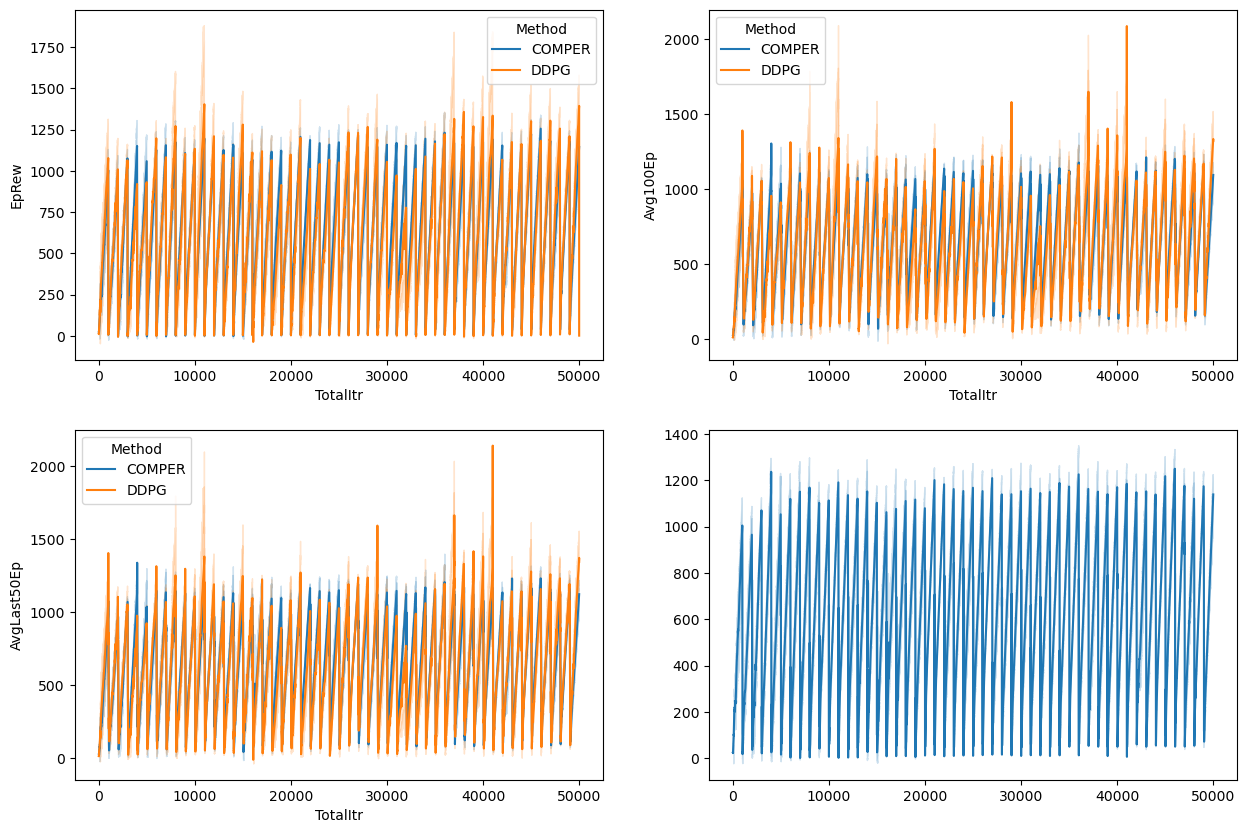

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])



In [ ]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,15-07-2023 15:10:09,Hopper-v2,5000,6.339302,COMPER
1,1,15-07-2023 17:46:21,Hopper-v2,10000,6.474875,COMPER
2,1,15-07-2023 20:22:19,Hopper-v2,15000,6.297579,COMPER
3,1,15-07-2023 22:58:44,Hopper-v2,20000,6.381961,COMPER
4,1,16-07-2023 01:35:54,Hopper-v2,25000,6.451136,COMPER


In [ ]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,5.902889
std,1.428571,14507.211437,1.024588
min,1.000000,5000.000000,3.181947
25%,2.000000,15000.000000,6.277363
50%,3.000000,27500.000000,6.385876
75%,4.000000,40000.000000,6.438174
max,5.000000,50000.000000,6.560058


In [ ]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,10-05-2023 13:50:10,Hopper-v2,5000,17.700766,DDPG
1,1,10-05-2023 13:53:42,Hopper-v2,10000,18.739886,DDPG
2,1,10-05-2023 13:57:39,Hopper-v2,15000,17.896230,DDPG
3,1,10-05-2023 14:01:57,Hopper-v2,20000,3.484941,DDPG
4,1,10-05-2023 14:06:37,Hopper-v2,25000,3.506257,DDPG


In [ ]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,8.807684
std,1.428571,14507.211437,8.989407
min,1.000000,5000.000000,1.775544
25%,2.000000,15000.000000,2.472150
50%,3.000000,27500.000000,3.570446
75%,4.000000,40000.000000,17.736273
max,5.000000,50000.000000,46.195308


In [ ]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

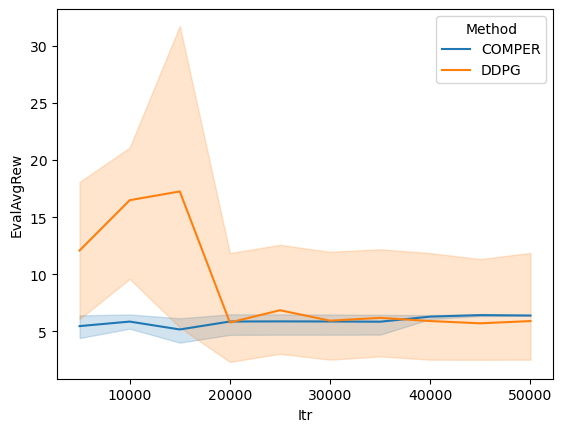

In [ ]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')